In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# ==============================
# PATH DATASET
# ==============================
BASE_DIR = "/content/drive/MyDrive/semester 7/Skripsi/dataset"
DATA_DIR = os.path.join(BASE_DIR, "Banana_Leaf_Disease_Dataset_Bangladesh")   # <- ganti kalau mau EDA folder baru

classes = ["pestalotiopsis", "sigatoka", "cordana", "healthy"]

# ==============================
# OUTPUT EDA (folder baru biar rapi)
# ==============================
EDA_DIR = os.path.join(BASE_DIR, "eda_bab4_output")
os.makedirs(EDA_DIR, exist_ok=True)

print("BASE_DIR:", BASE_DIR)
print("DATA_DIR:", DATA_DIR, "| exist:", os.path.exists(DATA_DIR))
print("EDA_DIR :", EDA_DIR)
print("Classes :", classes)


BASE_DIR: /content/drive/MyDrive/semester 7/Skripsi/dataset
DATA_DIR: /content/drive/MyDrive/semester 7/Skripsi/dataset/Banana_Leaf_Disease_Dataset_Bangladesh | exist: True
EDA_DIR : /content/drive/MyDrive/semester 7/Skripsi/dataset/eda_bab4_output
Classes : ['pestalotiopsis', 'sigatoka', 'cordana', 'healthy']


In [5]:
def list_images(folder):
    exts = ("*.jpg","*.jpeg","*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(folder, e)))
    return sorted(files)

class_counts = []
for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    n = len(list_images(cls_path))
    class_counts.append({"Kelas": cls, "Jumlah Citra": n})

df_class = pd.DataFrame(class_counts)
display(df_class)

csv_path = os.path.join(EDA_DIR, "eda_class_distribution.csv")
df_class.to_csv(csv_path, index=False)
print("Saved:", csv_path)

print("Total citra:", df_class["Jumlah Citra"].sum())


,Kelas,Jumlah Citra
0,pestalotiopsis,117
1,sigatoka,100
2,cordana,100
3,healthy,107


Saved: /content/drive/MyDrive/semester 7/Skripsi/dataset/eda_bab4_output/eda_class_distribution.csv
Total citra: 424


In [6]:
sizes = []

for cls in classes:
    cls_dir = os.path.join(DATA_DIR, cls)
    for f in list_images(cls_dir):
        try:
            with Image.open(f) as img:
                w, h = img.size
            sizes.append({
                "Kelas": cls,
                "Width": w,
                "Height": h,
                "File": os.path.basename(f)
            })
        except:
            pass

df_sizes = pd.DataFrame(sizes)

display(df_sizes.head(10))
print("Total images recorded:", len(df_sizes))


,Kelas,Width,Height,File
0,pestalotiopsis,320,427,pestalotiopsis1.jpg
1,pestalotiopsis,427,320,pestalotiopsis10.jpg
2,pestalotiopsis,320,427,pestalotiopsis100.jpg
3,pestalotiopsis,320,427,pestalotiopsis101.jpg
4,pestalotiopsis,427,320,pestalotiopsis102.jpg
5,pestalotiopsis,427,320,pestalotiopsis103.jpg
6,pestalotiopsis,320,427,pestalotiopsis104.jpg
7,pestalotiopsis,427,320,pestalotiopsis105.jpg
8,pestalotiopsis,320,427,pestalotiopsis106.jpg
9,pestalotiopsis,427,320,pestalotiopsis107.jpg


Total images recorded: 424


In [12]:
from collections import Counter

# Hitung frekuensi resolusi (width, height)
resolution_counter = Counter(
    [(row["Width"], row["Height"]) for _, row in df_sizes.iterrows()]
)

# Ambil Top 3 resolusi terbanyak
top3_res = resolution_counter.most_common(20)

# Buat tabel ringkas (Bab IV friendly)
top3_df = pd.DataFrame(
    top3_res,
    columns=["Resolusi (Width×Height)", "Jumlah Citra"]
)

# Pecah resolusi jadi width & height biar rapi
top3_df["Width"] = top3_df["Resolusi (Width×Height)"].apply(lambda x: x[0])
top3_df["Height"] = top3_df["Resolusi (Width×Height)"].apply(lambda x: x[1])

top3_df = top3_df[["Width", "Height", "Jumlah Citra"]]

display(top3_df)

# Simpan ke CSV (bukti Bab IV)
csv_top3 = os.path.join(EDA_DIR, "eda_top3_image_resolution.csv")
top3_df.to_csv(csv_top3, index=False)
print("Saved:", csv_top3)

,Width,Height,Jumlah Citra
0,320,427,294
1,427,320,102
2,427,223,4
3,427,319,3
4,427,293,2
5,427,278,2
6,400,320,2
7,427,285,2
8,407,320,1
9,427,312,1


Saved: /content/drive/MyDrive/semester 7/Skripsi/dataset/eda_bab4_output/eda_top3_image_resolution.csv


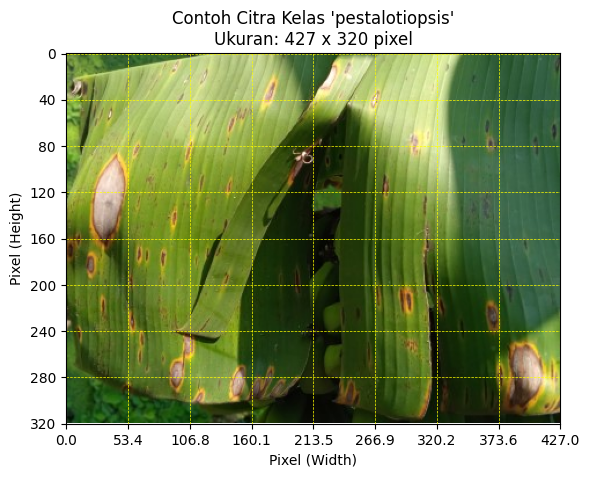

In [20]:
import matplotlib.pyplot as plt

# Ambil satu contoh gambar
sample_cls = classes[0]
sample_img_path = os.path.join(
    DATA_DIR, sample_cls,
    os.listdir(os.path.join(DATA_DIR, sample_cls))[0]
)

img = Image.open(sample_img_path)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title(f"Contoh Citra Kelas '{sample_cls}'\nUkuran: {img.size[0]} x {img.size[1]} pixel")

# Aktifkan grid pixel
plt.xticks(np.linspace(0, img.size[0], 9))
plt.yticks(np.linspace(0, img.size[1], 9))
plt.grid(color="yellow", linestyle="--", linewidth=0.5)

plt.xlabel("Pixel (Width)")
plt.ylabel("Pixel (Height)")
plt.tight_layout()
plt.show()

In [13]:
broken = []
checked = 0

valid_ext = (".jpg",".jpeg",".png")

for cls in classes:
    cls_dir = os.path.join(DATA_DIR, cls)
    for f in os.listdir(cls_dir):
        if not f.lower().endswith(valid_ext):
            continue

        path = os.path.join(cls_dir, f)
        checked += 1
        try:
            with Image.open(path) as im:
                im.verify()  # cek struktur file
        except Exception as e:
            broken.append({
                "Kelas": cls,
                "File": f,
                "Path": path,
                "Error": str(e)[:150]
            })

broken_df = pd.DataFrame(broken)
broken_count = len(broken_df)

summary_df = pd.DataFrame([{
    "Total diperiksa": checked,
    "Valid": checked - broken_count,
    "Rusak / tidak terbuka": broken_count,
    "Persentase rusak (%)": round((broken_count/checked)*100, 4) if checked else 0
}])

print("=== RINGKASAN CEK GAMBAR RUSAK ===")
display(summary_df)

csv_summary = os.path.join(EDA_DIR, "eda_broken_summary.csv")
summary_df.to_csv(csv_summary, index=False)
print("Saved:", csv_summary)

if broken_count > 0:
    display(broken_df.head(10))
    csv_broken = os.path.join(EDA_DIR, "eda_broken_files.csv")
    broken_df.to_csv(csv_broken, index=False)
    print("Saved:", csv_broken)
else:
    print("✅ Tidak ditemukan gambar rusak.")


=== RINGKASAN CEK GAMBAR RUSAK ===


,Total diperiksa,Valid,Rusak / tidak terbuka,Persentase rusak (%)
0,424,424,0,0.0


Saved: /content/drive/MyDrive/semester 7/Skripsi/dataset/eda_bab4_output/eda_broken_summary.csv
✅ Tidak ditemukan gambar rusak.


In [14]:
# ======================================
# EDA: Cek Format Gambar (JPEG / PNG)
# ======================================

format_records = []

for cls in classes:
    cls_dir = os.path.join(DATA_DIR, cls)
    for f in list_images(cls_dir):
        ext = os.path.splitext(f)[1].lower()
        try:
            with Image.open(f) as img:
                detected_format = img.format
                width, height = img.size

            format_records.append({
                "Kelas": cls,
                "File": os.path.basename(f),
                "Extension": ext,
                "Detected_Format": detected_format,
                "Width": width,
                "Height": height,
                "Status": "OK"
            })

        except Exception as e:
            format_records.append({
                "Kelas": cls,
                "File": os.path.basename(f),
                "Extension": ext,
                "Detected_Format": "ERROR",
                "Width": None,
                "Height": None,
                "Status": str(e)[:150]
            })

df_format = pd.DataFrame(format_records)

print("Total citra diperiksa:", len(df_format))
display(df_format.head(10))


Total citra diperiksa: 424


,Kelas,File,Extension,Detected_Format,Width,Height,Status
0,pestalotiopsis,pestalotiopsis1.jpg,.jpg,JPEG,320,427,OK
1,pestalotiopsis,pestalotiopsis10.jpg,.jpg,JPEG,427,320,OK
2,pestalotiopsis,pestalotiopsis100.jpg,.jpg,JPEG,320,427,OK
3,pestalotiopsis,pestalotiopsis101.jpg,.jpg,JPEG,320,427,OK
4,pestalotiopsis,pestalotiopsis102.jpg,.jpg,JPEG,427,320,OK
5,pestalotiopsis,pestalotiopsis103.jpg,.jpg,JPEG,427,320,OK
6,pestalotiopsis,pestalotiopsis104.jpg,.jpg,JPEG,320,427,OK
7,pestalotiopsis,pestalotiopsis105.jpg,.jpg,JPEG,427,320,OK
8,pestalotiopsis,pestalotiopsis106.jpg,.jpg,JPEG,320,427,OK
9,pestalotiopsis,pestalotiopsis107.jpg,.jpg,JPEG,427,320,OK


In [15]:
# ======================================
# Ringkasan format gambar
# ======================================

format_summary = (
    df_format[df_format["Status"] == "OK"]
    .groupby(["Detected_Format", "Extension"])
    .size()
    .reset_index(name="Jumlah Citra")
)

print("=== RINGKASAN FORMAT GAMBAR ===")
display(format_summary)


=== RINGKASAN FORMAT GAMBAR ===


,Detected_Format,Extension,Jumlah Citra
0,JPEG,.jpeg,7
1,JPEG,.jpg,417


In [16]:
# ==============================
# EDA: Brightness Analysis
# ==============================

brightness_data = []

for cls in classes:
    cls_dir = os.path.join(DATA_DIR, cls)
    for f in list_images(cls_dir):
        try:
            img = Image.open(f).convert("L")  # grayscale
            img_np = np.array(img)
            mean_brightness = img_np.mean()

            brightness_data.append({
                "Kelas": cls,
                "Brightness_Mean": mean_brightness
            })
        except:
            pass

df_brightness = pd.DataFrame(brightness_data)

# Ringkasan statistik
brightness_summary = df_brightness.groupby("Kelas")["Brightness_Mean"].agg(
    ["min", "max", "mean", "std"]
).reset_index()

display(brightness_summary)

# Simpan CSV (bukti Bab IV)
csv_brightness = os.path.join(EDA_DIR, "eda_brightness_summary.csv")
brightness_summary.to_csv(csv_brightness, index=False)
print("Saved:", csv_brightness)


,Kelas,min,max,mean,std
0,cordana,64.354797,158.598953,114.110975,18.929833
1,healthy,77.239952,161.783453,107.987842,15.976488
2,pestalotiopsis,81.706111,159.417418,116.405668,14.818295
3,sigatoka,81.939022,153.940533,113.614538,14.450779


Saved: /content/drive/MyDrive/semester 7/Skripsi/dataset/eda_bab4_output/eda_brightness_summary.csv


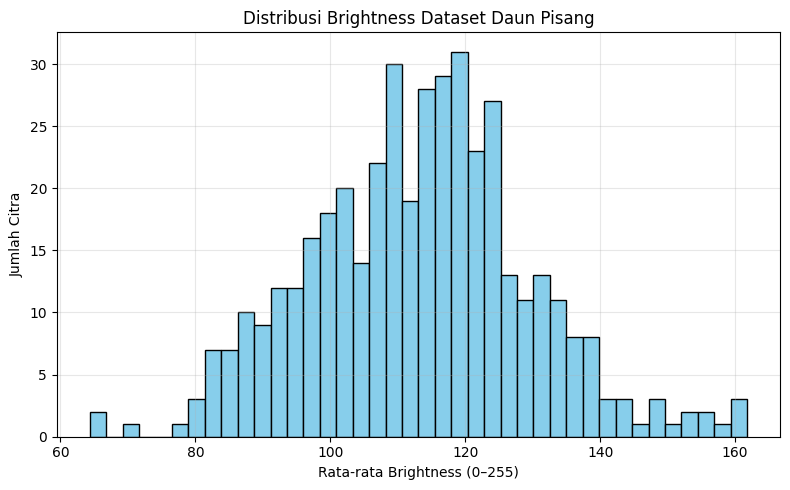

In [17]:
plt.figure(figsize=(8,5))
plt.hist(df_brightness["Brightness_Mean"], bins=40, color="skyblue", edgecolor="black")
plt.xlabel("Rata-rata Brightness (0–255)")
plt.ylabel("Jumlah Citra")
plt.title("Distribusi Brightness Dataset Daun Pisang")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
